In [177]:
import pandas as pd
import json
import sys
import datetime
import shutil
import os
import datetime

from openai import OpenAI
from dotenv import load_dotenv

load_dotenv() # Cargar las variables de entorno desde el archivo .env

True

In [80]:
import os
import openai
import pandas as pd

def load_prompt(filename):
    """Carga el prompt desde una ruta específica."""
    with open(filename, 'r') as file:
        return file.read()

In [81]:
# Initializing OpenAI client - see https://platform.openai.com/docs/quickstart?context=python
client = OpenAI()

In [179]:
df = pd.read_csv('data.csv')
len(df)


2632

In [180]:
df_filtrado = df[df['title_body_normalized'].str.contains('Luis Hermosilla', regex=False, na=False)]
len(df_filtrado)

2632

In [181]:
# Función para contar el número de palabras en una cadena
def count_words(text):
    return len(text.split())

# Agregar una nueva columna con el número de palabras
df['word_count'] = df['title_body'].apply(count_words)

# Calcular el máximo, el mínimo y el promedio del conteo de palabras
max_word_count = df['word_count'].max()
min_word_count = df['word_count'].min()
avg_word_count = df['word_count'].mean()
percentile_90 = df['word_count'].quantile(0.90)
percentile_95 = df['word_count'].quantile(0.94)
percentile_99 = df['word_count'].quantile(0.99)

# Imprimir los resultados
print(f'Máximo número de palabras: {max_word_count}')
print(f'Mínimo número de palabras: {min_word_count}')
print(f'Promedio número de palabras: {avg_word_count:.2f}')
print(f'Percentil 90: {percentile_90:.2f}')
print(f'Percentil 95: {percentile_95:.2f}')
print(f'Percentil 99: {percentile_99:.2f}')

Máximo número de palabras: 10221
Mínimo número de palabras: 61
Promedio número de palabras: 472.45
Percentil 90: 838.90
Percentil 95: 1070.42
Percentil 99: 2668.83


In [182]:
df_filtered = df[df['word_count'] <= percentile_95]
len(df_filtered)

2474

In [183]:
# Definir el límite de palabras por fila
max_words_per_row = 45000

# Crear listas para los textos concatenados y los conteos de palabras
texts = []
word_counts = []

# Variables para la concatenación
current_text = ''
current_word_count = 0

# Iterar sobre cada fila del DataFrame
for index, row in df_filtered.iterrows():
    text = row['title_body']
    word_count = row['word_count']
    
    # Verificar si agregar el texto excede el límite de palabras
    if current_word_count + word_count > max_words_per_row:
        # Si excede, agregar el texto actual a la lista
        texts.append(current_text.strip())
        word_counts.append(current_word_count)
        
        # Reiniciar el texto y el conteo
        current_text = text
        current_word_count = word_count
    else:
        # Si no excede, concatenar el texto al texto actual
        current_text += ' ' + text
        current_word_count += word_count

# Agregar el último grupo de texto
if current_text:
    texts.append(current_text.strip())
    word_counts.append(current_word_count)

# Crear el nuevo DataFrame
new_df = pd.DataFrame({
    'text': texts,
    'total_word_count': word_counts
})

# Imprimir el nuevo DataFrame
print(new_df)

                                                 text  total_word_count
0   Titulo de la noticia:\nPágina 11 | El Mercurio...             44797
1   Titulo de la noticia:\nManouchehri: "El senado...             44177
2   Titulo de la noticia:\nChats entre Luis Hermos...             44818
3   Titulo de la noticia:\nAsociación de Magistrad...             44583
4   Titulo de la noticia:\n¿Habrá investigación di...             44782
5   Titulo de la noticia:\n"Cuatro ucranianas, tre...             44171
6   Titulo de la noticia:\nCaso Hermosilla: contra...             44897
7   Titulo de la noticia:\n"Debe haber mucha gente...             44848
8   Titulo de la noticia:\nYa es oficial: Fiscalía...             44810
9   Titulo de la noticia:\nLa Moneda instruye a mi...             44576
10  Titulo de la noticia:\nChile Vamos y caso Audi...             44881
11  Titulo de la noticia:\nCuatro días después de ...             44434
12  Titulo de la noticia:\nFiscalía Oriente admite...           

In [184]:
df_filtered

,Unnamed: 0,title,body,date,url,source_title,source_dataType,source_uri,time,dateTime,title_body,title_body_normalized,word_count
0,266,Página 11 | El Mercurio de Valparaíso,CASO AUDIOS. Al igual que la defensa del aboga...,2024-09-14,https://www.mercuriovalpo.cl/impresa/2024/09/1...,http://www.mercuriovalpo.cl/,news,mercuriovalpo.cl,06:38:38,2024-09-14 06:38:38+00:00,Titulo de la noticia:\nPágina 11 | El Mercurio...,Titulo de la noticia:\nPagina 11 | El Mercurio...,545
1,304,Fiscalía incautó nuevos equipos tecnológicos d...,Esta acción se llevó a cabo en el marco de la ...,2024-09-13,https://www.t13.cl/noticia/politica/fiscalia-i...,T13 (teletrece),news,t13.cl,00:25:39,2024-09-13 00:25:39+00:00,Titulo de la noticia:\nFiscalía incautó nuevos...,Titulo de la noticia:\nFiscalia incauto nuevos...,216
2,310,Caso Audios: Felipe Ward dejó su cargo como vi...,"Manuel José Errázuriz, Seremi de Vivienda en e...",2024-09-13,https://www.adnradio.cl/2024/09/12/caso-audios...,ADN Radio 91.7 Chile,news,adnradio.cl,00:55:55,2024-09-13 00:55:55+00:00,Titulo de la noticia:\nCaso Audios: Felipe War...,Titulo de la noticia:\nCaso Audios: Felipe War...,331
3,315,Nuevas diligencias en investigación a Ángela V...,La operación logró la incautación de una compu...,2024-09-13,https://www.adnradio.cl/2024/09/12/nuevas-dili...,ADN Radio 91.7 Chile,news,adnradio.cl,00:02:18,2024-09-13 00:02:18+00:00,Titulo de la noticia:\nNuevas diligencias en i...,Titulo de la noticia:\nNuevas diligencias en i...,194
4,318,Confiscan equipos con los que Ángela Vivanco i...,Funcionarios del OS7 de Carabineros acudieron ...,2024-09-13,https://www.cnnchile.com/pais/confisca-equipos...,CNN,blog,cnnchile.com,00:00:56,2024-09-13 00:00:56+00:00,Titulo de la noticia:\nConfiscan equipos con l...,Titulo de la noticia:\nConfiscan equipos con l...,379
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2627,261710,Caso Audios: Comisión investigadora sostiene q...,"La comisión investigadora de la Cámara, abiert...",2024-05-07,https://www.t13.cl/noticia/nacional/ex-ante/ca...,T13 (teletrece),news,t13.cl,02:43:45,2024-05-07 02:43:45+00:00,Titulo de la noticia:\nCaso Audios: Comisión i...,Titulo de la noticia:\nCaso Audios: Comision i...,298
2628,262835,Caso Factop: Álvaro y Antonio Jalaff tienen ca...,"Álvaro Jalaff Sanz, empresario. Antonio Jalaff...",2024-05-03,https://www.df.cl/mercados/banca-fintech/caso-...,Diario Financiero,news,df.cl,08:09:21,2024-05-03 08:09:21+00:00,Titulo de la noticia:\nCaso Factop: Álvaro y A...,Titulo de la noticia:\nCaso Factop: Alvaro y A...,665
2629,263320,"Caso audios: Comisión Investigadora concluye ""...",Desde la instancia indicaron que todos los ant...,2024-05-06,https://www.adnradio.cl/2024/05/06/caso-audios...,ADN Radio 91.7 Chile,news,adnradio.cl,19:18:14,2024-05-06 19:18:14+00:00,Titulo de la noticia:\nCaso audios: Comisión I...,Titulo de la noticia:\nCaso audios: Comision I...,258
2630,264388,Redes de corrupción y tráfico de influencias: ...,"""Más que un penalista, era un operador del pod...",2024-05-06,https://radio.uchile.cl/2024/05/06/redes-de-co...,"102.5 FM, Radio Universidad de Chile",news,radio.uchile.cl,18:09:36,2024-05-06 18:09:36+00:00,Titulo de la noticia:\nRedes de corrupción y t...,Titulo de la noticia:\nRedes de corrupcion y t...,438


In [185]:
prompt_path = 'prompts/promt_hermosilla_graphV2.txt'

prompt = load_prompt(prompt_path)
len(prompt)

3353

In [186]:
print(prompt)

Your task is to identify all the individuals mentioned in the document, focusing on connections with Luis Hermosilla (lawyer), who is known for participating in numerous corruption cases.
Or in individuals that are explicit implicated in corruption cases
Provide structured information for each individual in relation to their involvement with Luis Hermosilla or others connected to him. 
It's important to identify both direct and indirect relationships between individuals, as well as relationships among those connected.

The response should include two components: "nodes" and "edges":

- **nodes**: A list of dictionaries representing individuals with the following fields:
  - "id": unique numeric identifier for each individual.
  - "label": full name of the individual (first name and last name).
  - "summary": a one-sentence summary in English describing the individual's role or involvement in corruption cases.

- **edges**: A list of dictionaries representing the relationships between i

In [187]:
print(df.columns)

Index(['Unnamed: 0', 'title', 'body', 'date', 'url', 'source_title',
       'source_dataType', 'source_uri', 'time', 'dateTime', 'title_body',
       'title_body_normalized', 'word_count'],
      dtype='object')


In [188]:
# Crear una lista de tareas en formato JSON
tasks = []

# Itera sobre el DataFrame
for index, row in new_df.iterrows():
    
    description = row['text']
    
    # Crear el objeto JSON para la tarea
    task = {
        "custom_id": f"task-{index}",
        "method": "POST",
        "url": "/v1/chat/completions",
        "body": {
            "model": "gpt-4o-mini",
            "temperature": 0.1,
            "response_format": { 
                "type": "json_object"
            },
            "messages": [
                {
                    "role": "system",
                    "content": prompt
                },
                {
                    "role": "user",
                    "content": description
                }
            ],
        }
    }
    
    # Añadir la tarea a la lista
    tasks.append(task)

# Ahora 'tasks' contiene todos los objetos JSON para las solicitudes API

In [189]:
# Creating the file

file_name = "data/batch_tasks_text2graph.jsonl"

with open(file_name, 'w') as file:
    for obj in tasks:
        file.write(json.dumps(obj) + '\n')

In [190]:
batch_file = client.files.create(
  file=open(file_name, "rb"),
  purpose="batch"
)
print(batch_file)

FileObject(id='file-euQE4A28V2VLDnHwlzzScMn6', bytes=6547467, created_at=1726337152, filename='batch_tasks_text2graph.jsonl', object='file', purpose='batch', status='processed', status_details=None)


In [191]:
batch_job = client.batches.create(
  input_file_id=batch_file.id,
  endpoint="/v1/chat/completions",
  completion_window="24h"
)

# Recolectar los resultados

In [192]:
jsonl_file_path = "data/batch_3PzRDdJEvxvpJ4Vsg0LMXNT8_output.jsonl" # Resultados en json
csv_file_path= "data/batch_results_2_chunk.csv"

In [193]:
def read_jsonl(file_path):
    with open(file_path, 'r') as file:
        # Leer todas las líneas del archivo
        lines = file.readlines()
        
        # Convertir cada línea en un diccionario Python
        json_lines = [json.loads(line) for line in lines]
        
    return json_lines
def process_json_data(json_lines):
    # Crear un DataFrame a partir de la lista de diccionarios
    df = pd.json_normalize(json_lines)
    
    return df
# Convertir a CSV
def convert_to_csv(json_lines, csv_path):
    df = process_json_data(json_lines)
    df.to_csv(csv_path, index=False)

In [194]:
json_lines = read_jsonl(jsonl_file_path)
convert_to_csv(json_lines, csv_file_path)

print(f"Archivo CSV guardado en: {csv_file_path}")

Archivo CSV guardado en: data/batch_results_2_chunk.csv


In [195]:
batch_df = pd.read_csv(csv_file_path)

In [196]:
batch_df

,id,custom_id,error,response.status_code,response.request_id,response.body.id,response.body.object,response.body.created,response.body.model,response.body.choices,response.body.usage.prompt_tokens,response.body.usage.completion_tokens,response.body.usage.total_tokens,response.body.usage.completion_tokens_details.reasoning_tokens,response.body.system_fingerprint
0,batch_req_o1k9pOBqdr7eHaX03KuRVxVv,task-0,NaN,200,01656ac3912c365340ca3898a56a8986,chatcmpl-A7Rvbo7lL5G8Xx0kXlcqBaJuzYR5n,chat.completion,1726339015,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63878,1531,65409,0,fp_483d39d857
1,batch_req_ScR2ZhxObhHshJj5cKkZiqa2,task-1,NaN,200,2f4184d1f797dd35a2ad032994f4caa2,chatcmpl-A7Rtbe5IeETdC5b1IHzc1F2ND8K6S,chat.completion,1726338891,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",62473,1473,63946,0,fp_483d39d857
2,batch_req_ukpLhVOXzbC80NXJfr5jofKd,task-2,NaN,200,d4f37eb1aa09190664ebb34f318d2cfa,chatcmpl-A7Ry9Gu9bB4I0AilqJneuSUrwCFxw,chat.completion,1726339173,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63042,1521,64563,0,fp_483d39d857
3,batch_req_I1noFhEt6vxPv1aHoKyDCvF7,task-3,NaN,200,b81dec1263685dc8812360b8a92fe0bb,chatcmpl-A7Rs1eTWiEDb4AZBi4nPYW6Btw1XQ,chat.completion,1726338793,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",62788,1051,63839,0,fp_483d39d857
4,batch_req_eOAOD1Ee0hl3uhd3j6DYNcot,task-4,NaN,200,7f6373ec8b2d236bb2c34ef4b823bfaa,chatcmpl-A7Rt616JHXotdJUbN5ACWBpP8UYpc,chat.completion,1726338860,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63059,1497,64556,0,fp_483d39d857
5,batch_req_9OsRkmVq4yx6GvQ4YuHRDi4h,task-5,NaN,200,fc36c07d5a320b6ee3225a2608cc0b53,chatcmpl-A7Rsa1uQ4jfPzs1PoPQvKFPCLilso,chat.completion,1726338828,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63770,1289,65059,0,fp_483d39d857
6,batch_req_ntjjZfEufQLb8oUWxC4UTKOA,task-6,NaN,200,47b24167a41e009fbd9728d789fcaccf,chatcmpl-A7S4fxgaLPyYUdrPMGf5RYJKbJIpX,chat.completion,1726339577,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63873,1574,65447,0,fp_483d39d857
7,batch_req_VEnKjt80ViwlPVq4AYDNxGMj,task-7,NaN,200,e3647cff4189ee3163b6b85251ba9578,chatcmpl-A7RsyYrelDnRMd1ds4VKFYzzUXZcX,chat.completion,1726338852,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",64302,1828,66130,0,fp_483d39d857
8,batch_req_GFGjhYByOkJj1xEv0RipwjeN,task-8,NaN,200,7ef6aa8b8c0838dd75c0363cf327b2e9,chatcmpl-A7RwDrCEmd54lKy636DfZN2nJKWto,chat.completion,1726339053,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",64340,1134,65474,0,fp_483d39d857
9,batch_req_LT6XgF4H6dIyWlUEscxAuAme,task-9,NaN,200,c3b99a9c4cb6372750bcd78eedb7f437,chatcmpl-A7S01ZXcZvUge9q9H5e5gp0veyMWa,chat.completion,1726339289,gpt-4o-mini-2024-07-18,"[{'index': 0, 'message': {'role': 'assistant',...",63050,1441,64491,0,fp_483d39d857


# Reading results

In [197]:
import pandas as pd

results_list = []

json_dict = {res['custom_id']: res for res in json_lines}

for res in json_lines:
    task_id = res['custom_id']
    # Obtener el índice del task_id
    index = int(task_id.split('-')[-1])
    result = res['response']['body']['choices'][0]['message']['content']
    
    # Almacenar el resultado, el índice y la línea JSON completa en la lista
    results_list.append({
        'index': index,
        'result': result,
        'output_batch': json_dict.get(task_id)  # Agregar la línea JSON completa
    })

# Convertir la lista en un DataFrame
results_df = pd.DataFrame(results_list)

# Combinar con el DataFrame original usando el índice para preservar el orden original
df_results = new_df.merge(results_df, left_index=True, right_on='index', how='left')

# Guardar el DataFrame resultante en un archivo CSV
df_results.to_csv('data/resultados_batch_merge_input.csv', index=False)


In [198]:
df_batch_merge_input = pd.read_csv('data/resultados_batch_merge_input.csv')

In [199]:
df_batch_merge_input

,text,total_word_count,index,result,output_batch
0,Titulo de la noticia:\nPágina 11 | El Mercurio...,44797,0,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_o1k9pOBqdr7eHaX03KuRVxVv', '..."
1,"Titulo de la noticia:\nManouchehri: ""El senado...",44177,1,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_ScR2ZhxObhHshJj5cKkZiqa2', '..."
2,Titulo de la noticia:\nChats entre Luis Hermos...,44818,2,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_ukpLhVOXzbC80NXJfr5jofKd', '..."
3,Titulo de la noticia:\nAsociación de Magistrad...,44583,3,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_I1noFhEt6vxPv1aHoKyDCvF7', '..."
4,Titulo de la noticia:\n¿Habrá investigación di...,44782,4,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_eOAOD1Ee0hl3uhd3j6DYNcot', '..."
5,"Titulo de la noticia:\n""Cuatro ucranianas, tre...",44171,5,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_9OsRkmVq4yx6GvQ4YuHRDi4h', '..."
6,Titulo de la noticia:\nCaso Hermosilla: contra...,44897,6,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_ntjjZfEufQLb8oUWxC4UTKOA', '..."
7,"Titulo de la noticia:\n""Debe haber mucha gente...",44848,7,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_VEnKjt80ViwlPVq4AYDNxGMj', '..."
8,Titulo de la noticia:\nYa es oficial: Fiscalía...,44810,8,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_GFGjhYByOkJj1xEv0RipwjeN', '..."
9,Titulo de la noticia:\nLa Moneda instruye a mi...,44576,9,"{\n ""nodes"": [\n {\n ""id""...","{'id': 'batch_req_LT6XgF4H6dIyWlUEscxAuAme', '..."


In [200]:
import json
import pandas as pd

def parse_string_to_json(df, column_name):
    # Función para parsear un string a objeto JSON
    def parse_string(string):
        try:
            parsed_json = json.loads(string)
            return parsed_json
        except Exception as e:
            start_idx = string.find('{')
            end_idx = string.rfind('}')
            if start_idx != -1 and end_idx != -1 and end_idx > start_idx:
                json_str = string[start_idx:end_idx+1]
                try:
                    parsed_json = json.loads(json_str)
                    return parsed_json
                except Exception as e:
                    pass  
            try:
                if "'nodes':" in string and "'edges':" in string:
                    json_str = string.replace("'", '"')
                    parsed_json = json.loads(json_str)
                    return parsed_json
            except Exception as e:
                pass  
            return None
    
    df[f'{column_name}_parsed'] = df[column_name].apply(parse_string)
    correct_count = df[f'{column_name}_parsed'].notna().sum()
    total_count = len(df)
    proportion_correct = correct_count / total_count
    # Imprimir la proporción de JSON correctos
    print(f"Proporción de JSON correctos: {proportion_correct:.2%}")
    return df

import pandas as pd

def extract_relations(parsed_data, original_dataframe_index, df_original):
    # Crear un diccionario que mapea el ID al label y summary de cada nodo
    id_to_info = {node['id']: {'label': node['label'], 'summary': node.get('summary', 'Sin resumen')} 
                  for node in parsed_data['nodes']}
    
    # Obtener la información de URL y título desde el DataFrame original
    url = df_original.at[original_dataframe_index, 'url']
    title = df_original.at[original_dataframe_index, 'title']
    
    rows = []

    for edge in parsed_data['edges']:
        from_id = edge['from']
        to_id = edge['to']

        # Verificar si tanto el nodo 'from' como el nodo 'to' están en el diccionario
        if from_id in id_to_info and to_id in id_to_info:
            from_info = id_to_info.get(from_id, {'label': 'Desconocido', 'summary': 'Sin resumen'})
            to_info = id_to_info.get(to_id, {'label': 'Desconocido', 'summary': 'Sin resumen'})
            label = edge.get('label', 'Unknown')
            sentiment = edge.get('sentiment', 'Unknown')

            # Asegurarse de que ambos nodos tienen etiquetas válidas
            if from_info['label'] != 'Desconocido' and to_info['label'] != 'Desconocido':
                rows.append({
                    'persona 1': from_info['label'],
                    'persona 2': to_info['label'],
                    'summary_person_1': from_info['summary'],
                    'summary_person_2': to_info['summary'],
                    'label': label,
                    'sentiment': sentiment,
                    'original_index': original_dataframe_index,
                    'url': url,
                    'title': title
                })
            else:
                print(f"Advertencia: Uno de los nodos no tiene una etiqueta válida: from_id={from_id}, to_id={to_id}")
        else:
            print(f"Índices no válidos: from_id={from_id}, to_id={to_id}")

    return rows

def edgelist_version(df, column_name):
    relations = []
    for idx, parsed_inference in df[column_name].items():
        if isinstance(parsed_inference, dict) and 'nodes' in parsed_inference and 'edges' in parsed_inference:
            extracted_relations = extract_relations(parsed_inference, idx, df)
            relations.extend(extracted_relations)
        else:
            print(f"Advertencia: El dato en la fila {idx} no tiene una estructura JSON válida o está vacío.")
    
    if relations:
        edgelist = pd.DataFrame(relations, columns=[
            'persona 1', 'persona 2', 'summary_person_1', 'summary_person_2', 'label', 'sentiment', 'original_index', 'url', 'title'
        ])
    else:
        edgelist = pd.DataFrame(columns=[
            'persona 1', 'persona 2', 'summary_person_1', 'summary_person_2', 'label', 'sentiment', 'original_index', 'url', 'title'
        ])

    return edgelist

# Supongamos que df_gpt es el DataFrame original
# edgelist_df = edgelist_version(df_gpt, 'result_parsed')


In [201]:
import pandas as pd
import json

def extract_relations(parsed_data, original_dataframe_index, df_original):
    # Crear un diccionario que mapea el ID al label y summary de cada nodo
    id_to_info = {node['id']: {'label': node['label'], 'summary': node.get('summary', 'Sin resumen')} 
                  for node in parsed_data['nodes']}
    
    rows = []

    for edge in parsed_data['edges']:
        from_id = edge['from']
        to_id = edge['to']

        # Verificar si tanto el nodo 'from' como el nodo 'to' están en el diccionario
        if from_id in id_to_info and to_id in id_to_info:
            from_info = id_to_info.get(from_id, {'label': 'Desconocido', 'summary': 'Sin resumen'})
            to_info = id_to_info.get(to_id, {'label': 'Desconocido', 'summary': 'Sin resumen'})
            label = edge.get('label', 'Unknown')
            summary_label = edge.get('summary', 'Sin resumen')

            # Asegurarse de que ambos nodos tienen etiquetas válidas
            if from_info['label'] != 'Desconocido' and to_info['label'] != 'Desconocido':
                rows.append({
                    'person_1': from_info['label'],
                    'person_2': to_info['label'],
                    'summary_person_1': from_info['summary'],
                    'summary_person_2': to_info['summary'],
                    'label': label,
                    'summary_label': summary_label
                })
            else:
                print(f"Advertencia: Uno de los nodos no tiene una etiqueta válida: from_id={from_id}, to_id={to_id}")
        else:
            print(f"Índices no válidos: from_id={from_id}, to_id={to_id}")

    return rows

def edgelist_version(df, column_name):
    relations = []
    for idx, parsed_inference in df[column_name].items():
        if isinstance(parsed_inference, dict) and 'nodes' in parsed_inference and 'edges' in parsed_inference:
            extracted_relations = extract_relations(parsed_inference, idx, df)
            relations.extend(extracted_relations)
        else:
            print(f"Advertencia: El dato en la fila {idx} no tiene una estructura JSON válida o está vacío.")
    
    if relations:
        edgelist = pd.DataFrame(relations, columns=[
            'person_1', 'person_2', 'summary_person_1', 'summary_person_2', 'label', 'summary_label'
        ])
    else:
        edgelist = pd.DataFrame(columns=[
            'person_1', 'person_2', 'summary_person_1', 'summary_person_2', 'label', 'summary_label'
        ])

    return edgelist

# Supongamos que df_gpt es el DataFrame original
# edgelist_df = edgelist_version(df_gpt, 'result_parsed')


In [202]:
df = parse_string_to_json(df_batch_merge_input, 'result')

Proporción de JSON correctos: 100.00%


In [147]:
df.dropna(subset='result_parsed', inplace=True)

In [203]:
edgelist_df = edgelist_version(df, 'result_parsed')


In [204]:
edgelist_df

,person_1,person_2,summary_person_1,summary_person_2,label,summary_label
0,luis hermosilla,ángela vivanco,luis hermosilla is a lawyer currently in preve...,ángela vivanco is a supreme court minister und...,associate,luis hermosilla and ángela vivanco are associa...
1,luis hermosilla,felipe ward,luis hermosilla is a lawyer currently in preve...,felipe ward is a former minister of housing ac...,associate,luis hermosilla and felipe ward are associated...
2,luis hermosilla,andrés chadwick,luis hermosilla is a lawyer currently in preve...,andrés chadwick is a former minister of the in...,associate,luis hermosilla and andrés chadwick are associ...
3,luis hermosilla,daniel sauer,luis hermosilla is a lawyer currently in preve...,daniel sauer is a businessman involved in the ...,partner,luis hermosilla and daniel sauer are partners ...
4,luis hermosilla,ariel sauer,luis hermosilla is a lawyer currently in preve...,ariel sauer is a businessman and brother of da...,partner,luis hermosilla and ariel sauer are partners i...
...,...,...,...,...,...,...
314,luis hermosilla,carlos palma,A prominent lawyer involved in multiple corrup...,"Regional prosecutor of Aysén, investigated for...",associate,Carlos Palma is implicated in the investigatio...
315,daniel sauer,titi ahubert,Businessman and co-defendant in the 'Caso Audi...,"Wife of Daniel Sauer, who has publicly spoken ...",beneficiary,Daniel Sauer's actions in the corruption case ...
316,jean pierre matus,luis hermosilla,Supreme Court minister accused of having conne...,A prominent lawyer involved in multiple corrup...,associate,Jean Pierre Matus has been linked to Luis Herm...
317,juan pablo hermosilla,luis hermosilla,Luis Hermosilla's brother and defense attorney...,A prominent lawyer involved in multiple corrup...,collaborator,Juan Pablo Hermosilla actively defends and col...


In [205]:
import unidecode

edgelist_df['person_2'] = edgelist_df['person_2'].apply(lambda x: unidecode.unidecode(str(x)) if pd.notnull(x) else x)
edgelist_df['person_1'] = edgelist_df['person_1'].apply(lambda x: unidecode.unidecode(str(x)) if pd.notnull(x) else x)


In [206]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt


In [213]:
import networkx as nx
import matplotlib.pyplot as plt

# Crear el grafo
G = nx.Graph()
for _, row in edgelist_df.iterrows():
    persona1 = row['person_1']
    persona2 = row['person_2']
    label = row['label']
    G.add_edge(persona1, persona2, label=label)


In [215]:

# Usar el layout spring para obtener posiciones
pos = nx.spring_layout(G, seed=42)  # El seed asegura reproducibilidad



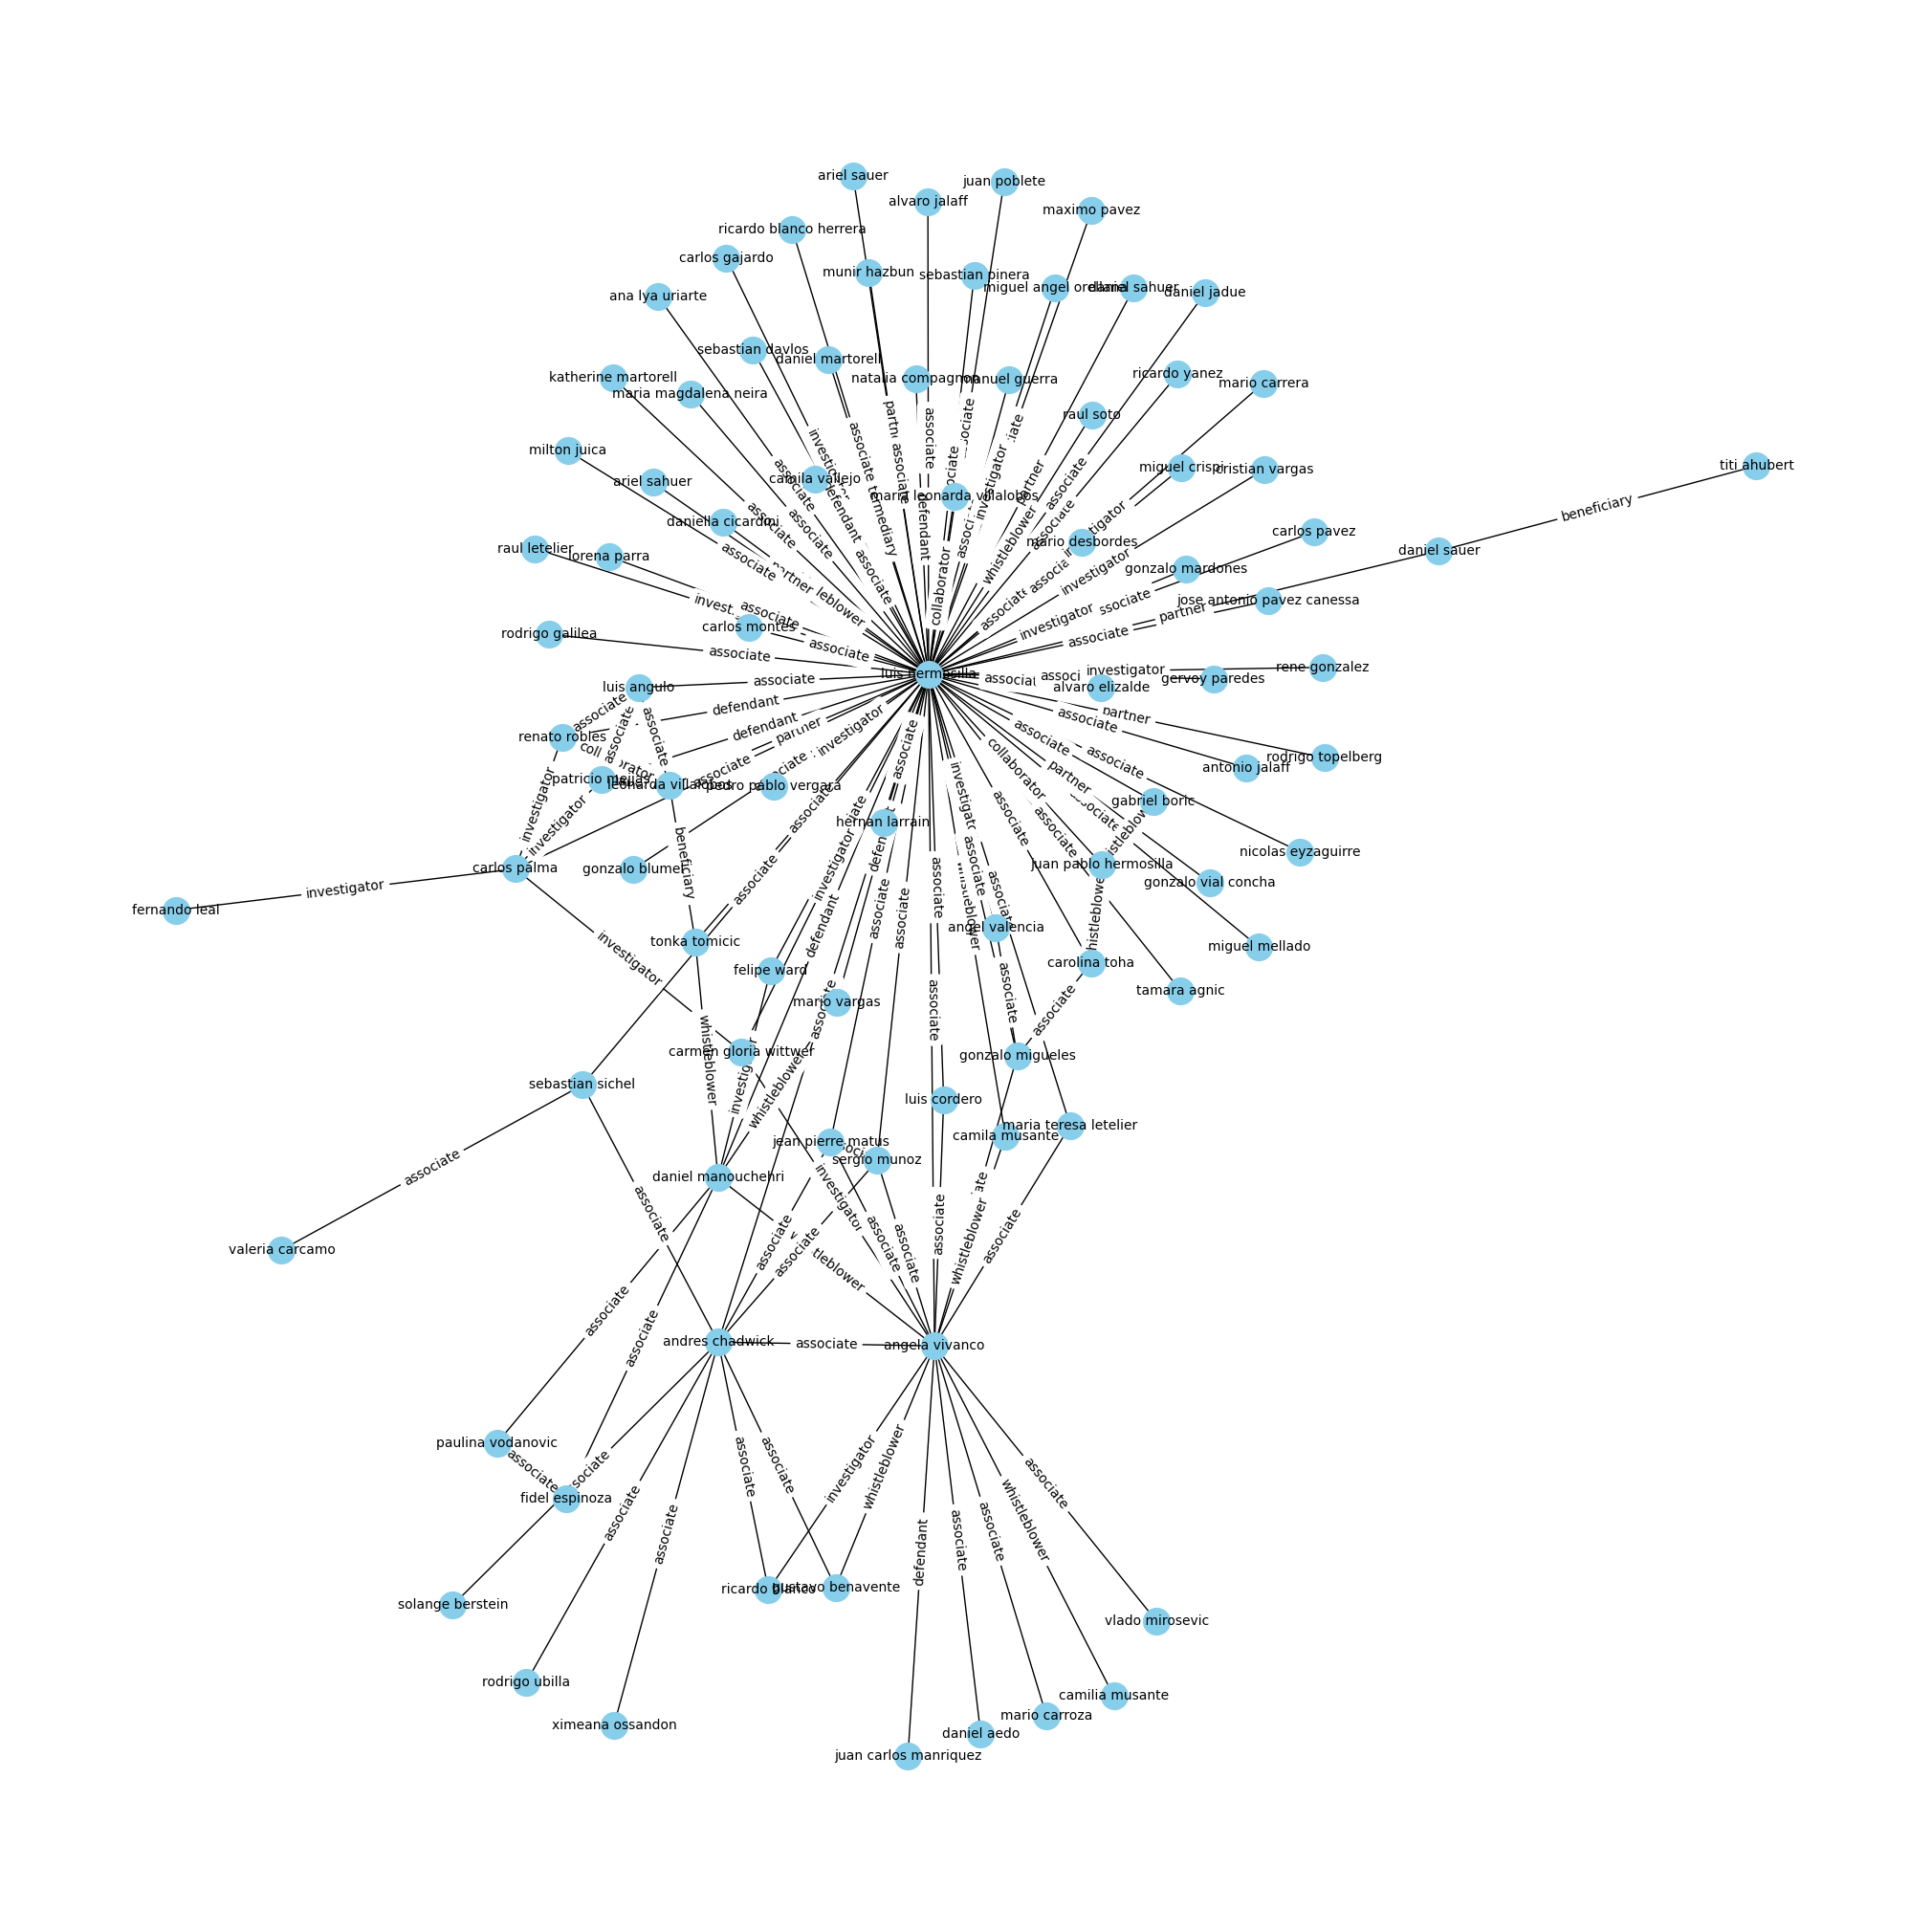

In [221]:
# Dibujar el subgrafo
plt.figure(figsize=(20, 20))

# Usar el layout spring para el subgrafo
pos = nx.spring_layout(G, seed=42)  # Ajusta el seed para reproducibilidad

# Dibujar el subgrafo
nx.draw(G, pos, with_labels=True, node_color='skyblue', node_size=400, font_size=10, font_color='black')
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='black', font_size=10)
plt.savefig("grafo_visualizacion.png", format="png")

plt.show()


In [176]:
edgelist_df = edgelist_df.sort_values(by='person_1')
edgelist_df

,person_1,person_2,summary_person_1,summary_person_2,label,summary_label
29,andres chadwick,ximena ossandon,"Former Minister of the Interior, closely assoc...",Leader of the RN parliamentary group who has c...,associate,Andrés Chadwick's connections and actions have...
10,andres chadwick,mario desbordes,"Former Minister of the Interior, closely assoc...","Former Minister of Defense, involved in discus...",associate,Andrés Chadwick and Mario Desbordes are connec...
30,angela vivanco,daniel manouchehri,Suspended Supreme Court minister under investi...,Socialist deputy and complainant in the case a...,investigator,Daniel Manouchehri is investigating Ángela Viv...
6,angela vivanco,gonzalo migueles,Minister of the Supreme Court implicated in co...,"Partner of Ángela Vivanco, involved in attempt...",associate,Ángela Vivanco and Gonzalo Migueles are partne...
38,angela vivanco,constanza martinez,Suspended Supreme Court minister under investi...,"President of the Frente Amplio, criticized the...",associate,Ángela Vivanco's actions have been criticized ...
...,...,...,...,...,...,...
25,luis hermosilla,andres chadwick,A prominent lawyer currently in preventive det...,"Former Minister of the Interior, closely assoc...",associate,Luis Hermosilla and Andrés Chadwick have a lon...
24,luis hermosilla,gladys gonzalez,A prominent lawyer currently in preventive det...,Businesswoman involved in a legal dispute with...,associate,Luis Hermosilla's connections extend to Gladys...
37,luis hermosilla,jose antonio kast,A prominent lawyer currently in preventive det...,"Leader of the Republican Party, commented on t...",associate,Luis Hermosilla's connections with various pol...
35,rodrigo topelberg,luis hermosilla,"Implicated in the case, previously under house...",A prominent lawyer currently in preventive det...,associate,Rodrigo Topelberg is involved in the same corr...


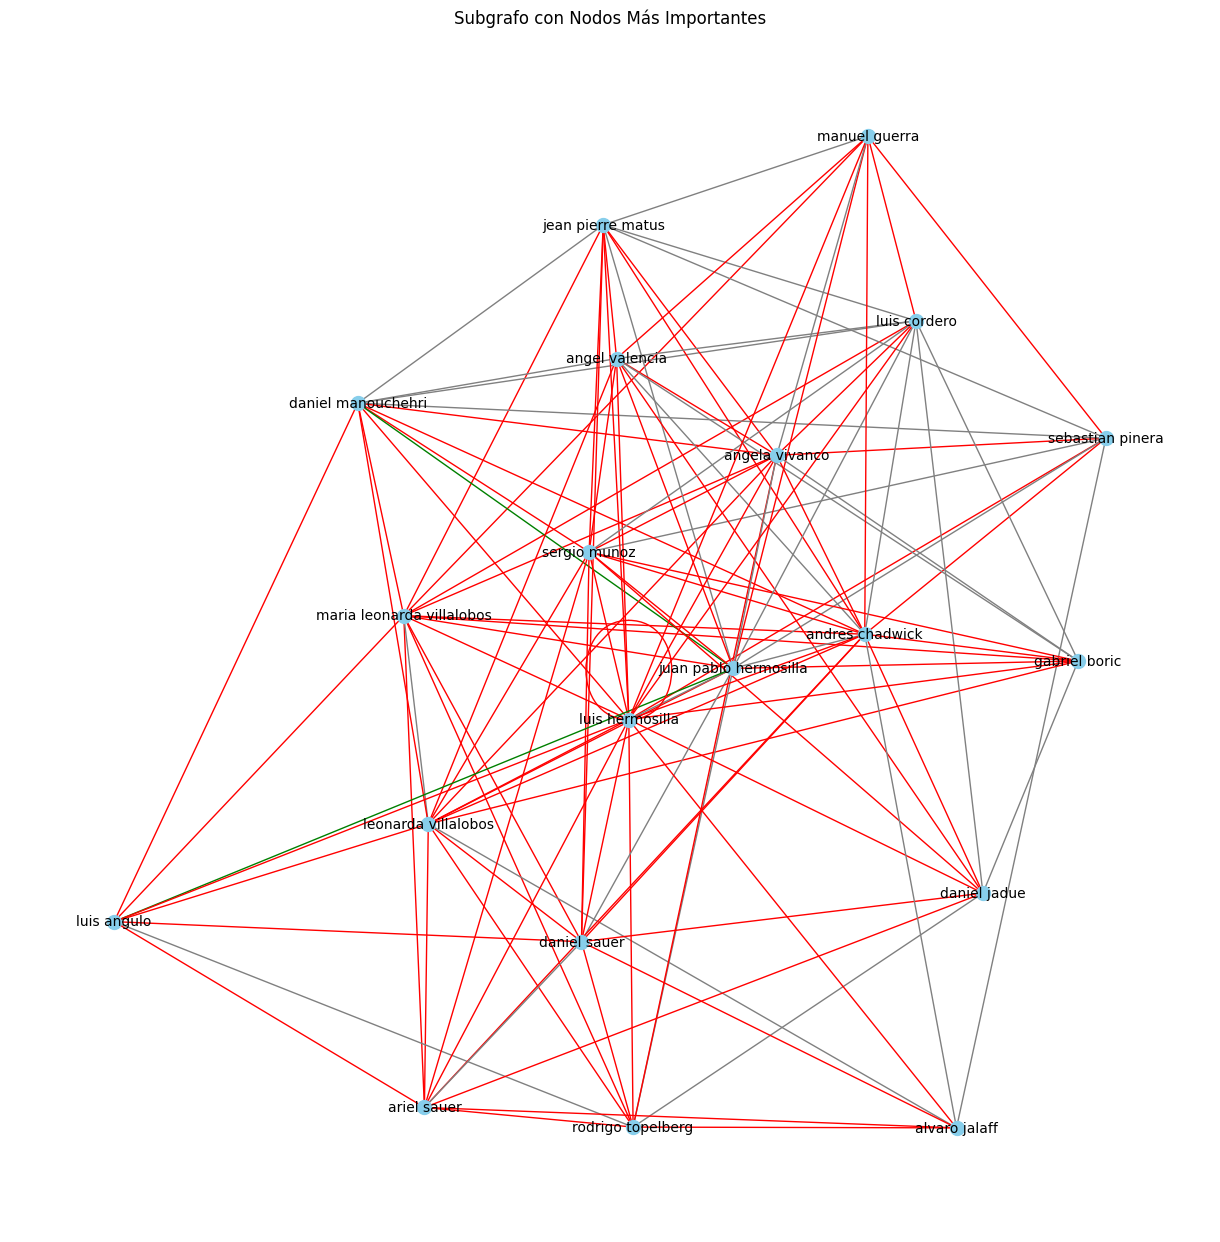

In [76]:
# Número de nodos importantes a seleccionar
top_n = 20  # Puedes ajustar este número según lo que necesites

# Seleccionar los top_n nodos más importantes
important_nodes = set(node for node, centrality in sorted_nodes[:top_n])

# Crear un subgrafo con los nodos importantes
subgraph = G.subgraph(important_nodes)

# Obtener los colores de las aristas del subgrafo
subgraph_edge_colors = []
for u, v, data in subgraph.edges(data=True):
    if data['sentiment'] == 'positive':
        subgraph_edge_colors.append('green')
    elif data['sentiment'] == 'neutral':
        subgraph_edge_colors.append('grey')
    else:
        subgraph_edge_colors.append('red')  # O cualquier otro color para otros sentimientos

# Dibujar el subgrafo
plt.figure(figsize=(12, 12))

# Usar el layout spring para el subgrafo
pos = nx.spring_layout(subgraph, seed=42)  # Ajusta el seed para reproducibilidad

# Dibujar el subgrafo
nx.draw(subgraph, pos, with_labels=True, node_color='skyblue', node_size=100, edge_color=subgraph_edge_colors, font_size=10, font_color='black')

plt.title("Subgrafo con Nodos Más Importantes")
plt.show()


In [73]:

subgraph_edges = set(subgraph.edges())

filtered_edgelist_df = edgelist_df[
    edgelist_df.apply(lambda row: (row['persona 1'], row['persona 2']) in subgraph_edges or 
                                       (row['persona 2'], row['persona 1']) in subgraph_edges, axis=1)
]

# Opcional: Seleccionar solo las columnas relevantes si es necesario
filtered_edgelist_df = filtered_edgelist_df[['persona 1', 'persona 2', 'summary_person_1', 'summary_person_2', 'label', 'sentiment', 'original_index', 'url', 'title']]

# Imprimir el DataFrame filtrado
print(filtered_edgelist_df)


                 persona 1            persona 2  \
4          luis hermosilla         daniel sauer   
6          luis hermosilla  leonarda villalobos   
7          luis hermosilla    rodrigo topelberg   
17         luis hermosilla       angela vivanco   
26          angela vivanco      luis hermosilla   
...                    ...                  ...   
19204  leonarda villalobos      luis hermosilla   
19211      luis hermosilla  leonarda villalobos   
19220      luis hermosilla    jean pierre matus   
19228      luis hermosilla    jean pierre matus   
19229    jean pierre matus      luis hermosilla   

                                        summary_person_1  \
4      Luis Hermosilla is a lawyer implicated in mult...   
6      Luis Hermosilla is a lawyer implicated in mult...   
7      Luis Hermosilla is a lawyer implicated in mult...   
17     luis hermosilla is a lawyer currently in preve...   
26     ángela vivanco is a minister and university le...   
...                        

In [74]:
# Imprimir todos los nodos
print("Todos los nodos:")
print(list(subgraph.nodes()))

Todos los nodos:
['luis hermosilla', 'juan pablo hermosilla', 'angela vivanco', 'andres chadwick', 'gabriel boric', 'rodrigo topelberg', 'leonarda villalobos', 'jean pierre matus', 'sergio munoz', 'daniel sauer']


In [77]:
filtered_edgelist_df = filtered_edgelist_df.sort_values(by='persona 1')


In [78]:
filtered_edgelist_df

,persona 1,persona 2,summary_person_1,summary_person_2,label,sentiment,original_index,url,title
12107,andres chadwick,luis hermosilla,el exministro del interior vinculado al caso a...,abogado conocido por su participación en casos...,collaborator,negative,3590,https://www.lanacion.cl/desbordes-cree-necesar...,Desbordes cree necesario que Chadwick se ponga...
5636,andres chadwick,luis hermosilla,Andrés Chadwick is a former Minister of the In...,Luis Hermosilla is a lawyer involved in numero...,associate,neutral,1954,https://www.chilevision.cl/noticias/nacional/a...,Chadwick defiende millonarias transferencias d...
9058,andres chadwick,luis hermosilla,Andrés Chadwick is a former minister and a his...,Luis Hermosilla is a lawyer known for his invo...,associate,neutral,2912,https://radio.uchile.cl/2024/08/27/caso-hermos...,"Caso Hermosilla: UDI asegura que ""no tiene nad..."
12271,andres chadwick,luis hermosilla,exministro del interior y cercano al abogado l...,un abogado implicado en numerosos casos de cor...,associate,neutral,3621,https://www.t13.cl/noticia/politica/angela-viv...,La entrevista en que Ángela Vivanco habló de C...
1320,andres chadwick,luis hermosilla,Andrés Chadwick es un exministro y amigo de Lu...,Luis Hermosilla es un abogado conocido por su ...,associate,negative,407,https://www.t13.cl/noticia/politica/no-nos-int...,"""No nos intimidas, matón"": El fuerte cruce ent..."
...,...,...,...,...,...,...,...,...,...
11330,sergio munoz,luis hermosilla,sergio muñoz es un exdirector de la policía de...,luis hermosilla es un abogado chileno implicad...,collaborator,negative,3404,https://www.t13.cl/noticia/politica/ministerio...,Ministerio Público indaga chats entre Hermosil...
3618,sergio munoz,luis hermosilla,sergio muñoz is the former director of the pol...,luis hermosilla is a lawyer involved in numero...,associate,negative,1256,https://www.lanacion.cl/fiscal-valencia-confir...,Fiscal Valencia confirma que funcionario públi...
3581,sergio munoz,luis hermosilla,sergio muñoz es el exdirector de investigacion...,luis hermosilla es un abogado conocido por su ...,defendant,negative,1248,https://www.emol.com/noticias/Nacional/2024/08...,"Caso Audios: Fiscalía se suma a tesis de ""caja..."
15770,sergio munoz,luis hermosilla,Sergio Muñoz fue el director de la Policía de ...,Luis Hermosilla es un abogado involucrado en n...,whistleblower,negative,5077,https://www.biobiochile.cl/noticias/nacional/c...,Burocracia brutal: A casi 3 meses de su salida...
